## Linear Regression

Task: do a linear regression

Our data are described by a linear function $ax+b$ plus some noise $n$

$$d_i = a x_i + b + n_i$$

$d_i$ are the measured values for some measuring point $x_i$.

The coefficiencts $a$ and $b$ are the same for all data $d_i$ and subsumed in a model vector

$${\bf m}=\begin{bmatrix}a\\b\end{bmatrix} = \begin{bmatrix}m_1\\m_2\end{bmatrix}$$

The forward operator is linear with respect to m and can be written as ${\bf A}{\bf m}={\bf d}$ with
$$
{\bf A}=\begin{bmatrix}
x_1 & 1\\
x_2 & 1\\
\ldots & \ldots \\
x_D & 1
\end{bmatrix}$$

**Task**: Write a function that creates a matrix for a set of given $x$ values. Create one for a given $x$ vector and plot some examples.

In [1]:
function LinRegMatrix(x)
    """Create Linear Regression matrix."""
    A = ones(length(x), 2)
    A[:, 1] = x[:]
    return A
end    

LinRegMatrix (generic function with 1 method)

[0.46774286099419105, -0.44384962060887057]mean=

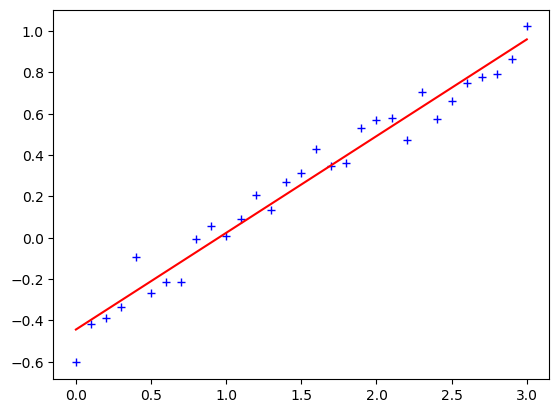

7.879002110243047e-17 std=0.07648164200492254

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000046F7FF08>

In [2]:
using PyPlot
using Statistics
x = 0:0.1:3.0
error = 0.1
A = LinRegMatrix(x)
d = A * [0.5; -0.5] + randn(length(x)) .* error
# determine least-squares solution
m = A \ d[:]
print(m)
residual = A * m - d[:]
print("mean=", mean(residual), " std=", std(residual))
plot(x, d, "b+")
plot(x, A*m, "r-")

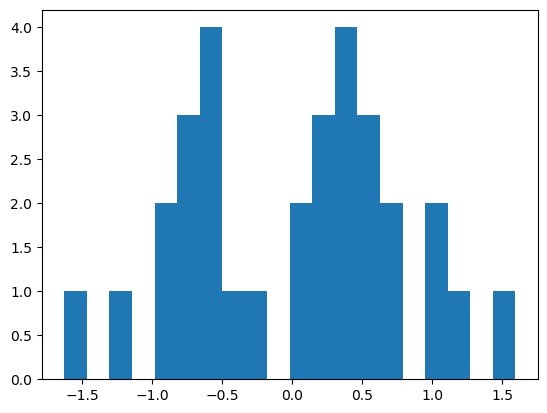

mean=8.093883985976947e-16 std=0.7648164200492253

In [3]:
eresidual = residual / error
print("mean=", mean(eresidual), " std=", std(eresidual))
hist(eresidual, bins=20);

### Lessons to be learned
1. The least-squares inversion minimizing the L2 norm is strongly connected to Gaussian statistics.
1. The error-weighted residual should (for large data numbers) show a Gaussian normal distribution (mean value of 0 and standard deviation of 1).
1. The misfit function should not show any systematics.

## Tasks for homework
1. Test with different values for the model and plot also the misfit $d-Am$
1. Increase the error level and look at the residual statistics.
1. Decrease or increase the number of measurements and watch statistics.
1. Test the same with common random noise instead of Gaussian noise.
1. Extend the matrix function to an arbitrary polynomial degree $P$

$$ y_i = \sum\limits_{j=0}^P a_{ij} x^j $$

(note the reversed order of coefficients)

1. Repeat the inversion by fitting a third-order polynomial.
1. Compute the singular value decomposition for different polynomial degrees.



2×2 Array{Float64,2}:
 1.0          -5.55112e-17
 5.55112e-17   1.0

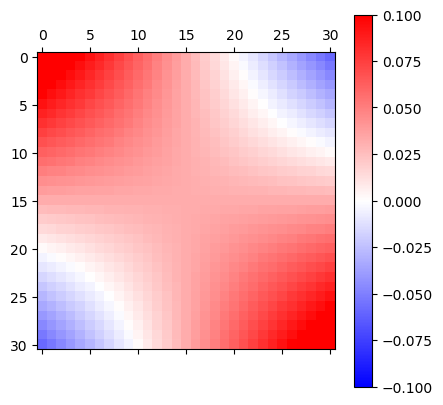

PyObject <matplotlib.colorbar.Colorbar object at 0x000000004A60C508>

In [36]:
AT = transpose(A)
Adag = inv(AT * A) * AT
RM = Adag * A
display(RM)
RD = A * Adag
matshow(RD)
clim([-0.1, 0.1])
set_cmap("bwr")
colorbar()

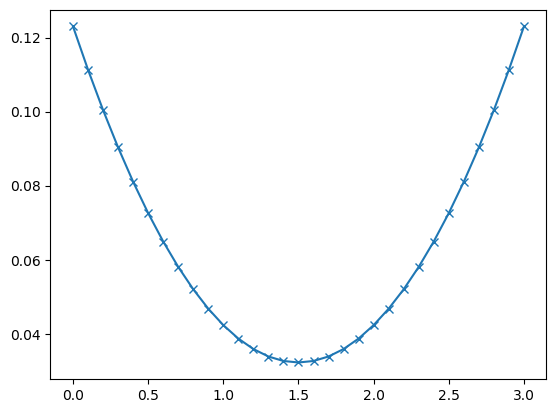

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000472F8588>

In [9]:
using LinearAlgebra
rd = diag(RD)
plot(x, rd, "x-")

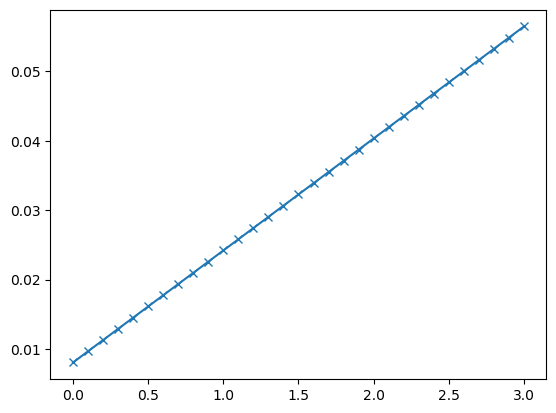

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003C6BBB88>

In [20]:
plot(x, RD[20, :], "x-")

In [40]:
print(A[:])

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]